In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Extremely rude ground service....
1,✅ Trip Verified | My son and I flew to Geneva...
2,✅ Trip Verified | For the price paid (bought ...
3,✅ Trip Verified | Flight left on time and arr...
4,✅ Trip Verified | Very Poor Business class pr...


In [6]:
df.to_csv("data/BA_reviews.csv")

In [7]:
import nltk

In [50]:
#import all the necessary modules
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/dell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def tokenisation(text):
    return word_tokenize(text.lower())

df['tokenised_text']=df['reviews'].apply(tokenisation)

In [26]:
df.head()

,reviews,tokenised_text
0,Not Verified | Extremely rude ground service....,"[not, verified, |, extremely, rude, ground, se..."
1,✅ Trip Verified | My son and I flew to Geneva...,"[✅, trip, verified, |, my, son, and, i, flew, ..."
2,✅ Trip Verified | For the price paid (bought ...,"[✅, trip, verified, |, for, the, price, paid, ..."
3,✅ Trip Verified | Flight left on time and arr...,"[✅, trip, verified, |, flight, left, on, time,..."
4,✅ Trip Verified | Very Poor Business class pr...,"[✅, trip, verified, |, very, poor, business, c..."


In [10]:
df['tokenised_text'].head()

0    [not, verified, |, extremely, rude, ground, se...
1    [✅, trip, verified, |, my, son, and, i, flew, ...
2    [✅, trip, verified, |, for, the, price, paid, ...
3    [✅, trip, verified, |, flight, left, on, time,...
4    [✅, trip, verified, |, very, poor, business, c...
Name: tokenised_text, dtype: object

In [11]:
import re
def clean_data(tokens):
    return [re.sub(r'[^\w\s]', '', token) for token in tokens]
df['cleaned_data']=df['tokenised_text'].apply(clean_data)

In [12]:
df['cleaned_data'].head()

0    [not, verified, , extremely, rude, ground, ser...
1    [, trip, verified, , my, son, and, i, flew, to...
2    [, trip, verified, , for, the, price, paid, , ...
3    [, trip, verified, , flight, left, on, time, a...
4    [, trip, verified, , very, poor, business, cla...
Name: cleaned_data, dtype: object

In [23]:
to_be_removed=['trip','not','verified']
final_cleaned_data=[]
for row in df['cleaned_data']:
    for token in row[:len(to_be_removed)]:
        if token in to_be_removed:
            row.remove(token)
    final_cleaned_data.append(row)

df['final_cleaned_data']=final_cleaned_data

In [24]:
df['final_cleaned_data'].head()

0    [, extremely, rude, ground, service, , we, wer...
1    [, , my, son, and, i, flew, to, geneva, last, ...
2    [, , for, the, price, paid, , bought, during, ...
3    [, , flight, left, on, time, and, arrived, ove...
4    [, , very, poor, business, class, product, , b...
Name: final_cleaned_data, dtype: object

In [25]:
df.head()

,reviews,tokenised_text,cleaned_data,final_cleaned_data
0,Not Verified | Extremely rude ground service....,"[not, verified, |, extremely, rude, ground, se...","[, extremely, rude, ground, service, , we, wer...","[, extremely, rude, ground, service, , we, wer..."
1,✅ Trip Verified | My son and I flew to Geneva...,"[✅, trip, verified, |, my, son, and, i, flew, ...","[, , my, son, and, i, flew, to, geneva, last, ...","[, , my, son, and, i, flew, to, geneva, last, ..."
2,✅ Trip Verified | For the price paid (bought ...,"[✅, trip, verified, |, for, the, price, paid, ...","[, , for, the, price, paid, , bought, during, ...","[, , for, the, price, paid, , bought, during, ..."
3,✅ Trip Verified | Flight left on time and arr...,"[✅, trip, verified, |, flight, left, on, time,...","[, , flight, left, on, time, and, arrived, ove...","[, , flight, left, on, time, and, arrived, ove..."
4,✅ Trip Verified | Very Poor Business class pr...,"[✅, trip, verified, |, very, poor, business, c...","[, , very, poor, business, class, product, , b...","[, , very, poor, business, class, product, , b..."


In [29]:
stopwords_removed=[]
for row in df['final_cleaned_data']:
    for token in row:
        if token in stopwords.words('english'):
            row.remove(token)
    stopwords_removed.append(row)
        
df["stopwords_removed"]=stopwords_removed
df["stopwords_removed"].head()

0    [, extremely, rude, ground, service, , nonrev,...
1    [, , son, flew, geneva, last, sunday, skiing, ...
2    [, , price, paid, , bought, sale, , decent, ex...
3    [, , flight, left, time, arrived, half, hour, ...
4    [, , poor, business, class, product, , ba, eve...
Name: stopwords_removed, dtype: object

In [83]:
lemmatiser=WordNetLemmatizer()
final_data=[]
for row in df['stopwords_removed']:
    token1=''
    for token in row:
        token1=token1+' '+lemmatiser.lemmatize(token)
    final_data.append(token1)
df["final_data"]=final_data

In [84]:
df['final_data'].head()

0      extremely rude ground service  nonrev flying...
1       son flew geneva last sunday skiing holiday ...
2       price paid  bought sale  decent experience ...
3       flight left time arrived half hour earlier ...
4       poor business class product  ba even close ...
Name: final_data, dtype: object

In [85]:
!pip install vaderSentiment

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment=[]

for row in df['final_data']:
    score=analyser.polarity_scores(row)
    sentiment.append(score['compound'])

df['sentiment']=sentiment
df.head()

,reviews,tokenised_text,cleaned_data,final_cleaned_data,stopwords_removed,final_data,sentiment
0,Not Verified | Extremely rude ground service....,"[not, verified, |, extremely, rude, ground, se...","[, extremely, rude, ground, service, , nonrev,...","[, extremely, rude, ground, service, , nonrev,...","[, extremely, rude, ground, service, , nonrev,...",extremely rude ground service nonrev flying...,0.8197
1,✅ Trip Verified | My son and I flew to Geneva...,"[✅, trip, verified, |, my, son, and, i, flew, ...","[, , son, flew, geneva, last, sunday, skiing, ...","[, , son, flew, geneva, last, sunday, skiing, ...","[, , son, flew, geneva, last, sunday, skiing, ...",son flew geneva last sunday skiing holiday ...,-0.7884
2,✅ Trip Verified | For the price paid (bought ...,"[✅, trip, verified, |, for, the, price, paid, ...","[, , price, paid, , bought, sale, , decent, ex...","[, , price, paid, , bought, sale, , decent, ex...","[, , price, paid, , bought, sale, , decent, ex...",price paid bought sale decent experience ...,0.9186
3,✅ Trip Verified | Flight left on time and arr...,"[✅, trip, verified, |, flight, left, on, time,...","[, , flight, left, time, arrived, half, hour, ...","[, , flight, left, time, arrived, half, hour, ...","[, , flight, left, time, arrived, half, hour, ...",flight left time arrived half hour earlier ...,-0.8126
4,✅ Trip Verified | Very Poor Business class pr...,"[✅, trip, verified, |, very, poor, business, c...","[, , poor, business, class, product, , ba, eve...","[, , poor, business, class, product, , ba, eve...","[, , poor, business, class, product, , ba, eve...",poor business class product ba even close ...,-0.2263


In [88]:
df['sentiment'].nunique()

587

In [89]:
df['sentiment'].value_counts()

sentiment
 0.4404    8
-0.0516    8
-0.7430    8
 0.9371    7
 0.3818    7
          ..
 0.9451    1
 0.9917    1
 0.9369    1
 0.2247    1
 0.9182    1
Name: count, Length: 587, dtype: int64

In [90]:
df['sentiment'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: sentiment
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [91]:
df['sentiment'].describe()

count    1000.000000
mean        0.170526
std         0.744582
min        -0.995200
25%        -0.648600
50%         0.420050
75%         0.911575
max         0.998300
Name: sentiment, dtype: float64

In [95]:
def analysis(score):
    if score>0.4:
        return 'Positive'
    if score<0:
        return 'Negative'
    else:
        return 'Neutral'

df['analysis']=df['sentiment'].apply(analysis)
df.head()

,reviews,tokenised_text,cleaned_data,final_cleaned_data,stopwords_removed,final_data,sentiment,analysis
0,Not Verified | Extremely rude ground service....,"[not, verified, |, extremely, rude, ground, se...","[, extremely, rude, ground, service, , nonrev,...","[, extremely, rude, ground, service, , nonrev,...","[, extremely, rude, ground, service, , nonrev,...",extremely rude ground service nonrev flying...,0.8197,Positive
1,✅ Trip Verified | My son and I flew to Geneva...,"[✅, trip, verified, |, my, son, and, i, flew, ...","[, , son, flew, geneva, last, sunday, skiing, ...","[, , son, flew, geneva, last, sunday, skiing, ...","[, , son, flew, geneva, last, sunday, skiing, ...",son flew geneva last sunday skiing holiday ...,-0.7884,Negative
2,✅ Trip Verified | For the price paid (bought ...,"[✅, trip, verified, |, for, the, price, paid, ...","[, , price, paid, , bought, sale, , decent, ex...","[, , price, paid, , bought, sale, , decent, ex...","[, , price, paid, , bought, sale, , decent, ex...",price paid bought sale decent experience ...,0.9186,Positive
3,✅ Trip Verified | Flight left on time and arr...,"[✅, trip, verified, |, flight, left, on, time,...","[, , flight, left, time, arrived, half, hour, ...","[, , flight, left, time, arrived, half, hour, ...","[, , flight, left, time, arrived, half, hour, ...",flight left time arrived half hour earlier ...,-0.8126,Negative
4,✅ Trip Verified | Very Poor Business class pr...,"[✅, trip, verified, |, very, poor, business, c...","[, , poor, business, class, product, , ba, eve...","[, , poor, business, class, product, , ba, eve...","[, , poor, business, class, product, , ba, eve...",poor business class product ba even close ...,-0.2263,Negative


In [97]:
counts=df['analysis'].value_counts()
counts

analysis
Positive    506
Negative    416
Neutral      78
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc070ebc110>,
 [Text(-0.02073322272803588, 1.099804588768073, 'Positive'),
  Text(-0.24669792697222784, -1.0719795393698546, 'Negative'),
  Text(1.3096708882740056, -0.3275090295054127, 'Neutral')],
 [Text(-0.011309030578928661, 0.5998934120553124, '50.6%'),
  Text(-0.13456250562121516, -0.5847161123835569, '41.6%'),
  Text(0.82460759632067, -0.20620938894785243, '7.8%')])

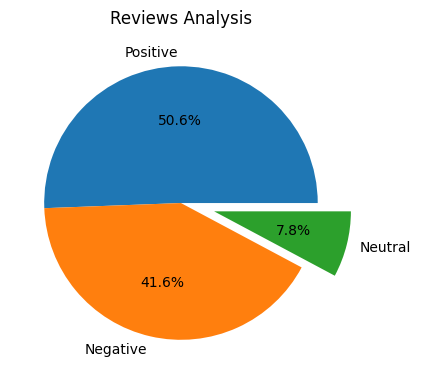

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(counts.values, labels = counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%')

In [100]:
!pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01


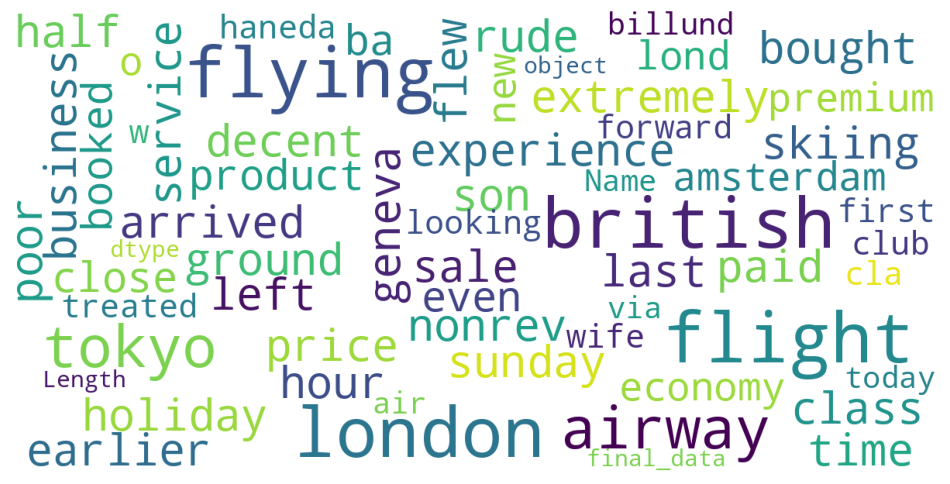

In [102]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.final_data)